# Audubon in Action: Creative Approaches in Data

During [Earth Week Data Jam](https://www.library.upenn.edu/about/exhibits-events/earth-week-data-jam), join Penn Libraries' Research Data and Digital Scholarship team (and friends) as we create, analyze, visualize, and experiment with data related to environmental issues and the natural world. Whether you're interested in learning how to decode professional data visualizations, working with qualitative data, or building your own data set from the ground up, we hope you find something that meets your needs.

In this notebook, we'll create mosaics, Instagram posts, and a sound file for one of the birds in the [Birds of Philadelphia](https://www.inaturalist.org/projects/birds-of-philadelphia) iNaturalist dataset.

* [Import What We Need](#Import-What-We-Need)
* [Load the Data](#Load-the-Data)
* [Build a Mosaic](#Build-a-Mosaic)
* [Build an Instagram Post](#Build-an-Instagram-Post)
* [Build a Sound File](#Build-a-Sound-File)
* [Credits](#Credits)

## Import What We Need

Choose out of this list of birds:
* Chestnut-sided Warbler
* Red-tailed Hawk
* Blue Jay
* Olive-sided Flycatcher
* Long-tailed Duck
* Golden-winged Warbler

In [19]:
# For use in the workshop - building for people to run through on their own with one selected bird
!pip install -r requirements.txt
your_name = input("Include your name for credit: ")
your_bird = input("Select a bird name from the list of birds above: ")

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Include your name for credit: Emily
Select a bird name from the list of birds above: Blue Jay


## Load the Data

In [20]:
# load pa_birds
import pandas as pd
import os
import subprocess
from PIL import Image  
from PIL import ImageFont
from PIL import ImageDraw
from pydub import AudioSegment
import os, random
import pandas as pd
import numpy as np
import os
import datetime
from datetime import date

directory_path = os.getcwd()
pa_birds = pd.read_csv("data/philly_birds_workshop.csv")
pa_birds = pa_birds[pa_birds['common_name']==your_bird].reset_index()
pa_birds

index   plate_no bird_name                            audubon_img  \
0      2  plate-102  blue-jay  plates/100-199/plate-102-blue-jay.jpg   

  in_dataset    inaturalist_folder             mosaic_img common_name  count  \
0        Yes  inaturalist/blue-jay  mosaics/blue-jay.jpeg    Blue Jay    110   

       scientific_name                              place_guess observed_on  \
0  Cyanocitta cristata  East Falls, Philadelphia, PA 19129, USA  2022-02-01   

              display_img    sounds_folder  
0  displays/blue-jay.jpeg  sounds/blue-jay

## Build a Mosaic

reading input folder...
Invalid image: /Users/estene/Documents/GitHub/audubon/inaturalist/blue-jay/.DS_Store
starting photomosaic creation...
resizing images...
max tile dims: (62, 76)
processed 1000 of 10000...
processed 2000 of 10000...
processed 3000 of 10000...
processed 4000 of 10000...
processed 5000 of 10000...
processed 6000 of 10000...
processed 7000 of 10000...
processed 8000 of 10000...
processed 9000 of 10000...
saved output to mosaics/blue-jay.jpeg
done.


Mosaic_Creator.py:105: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if count > 0 and batch_size > 10 and count % batch_size is 0:


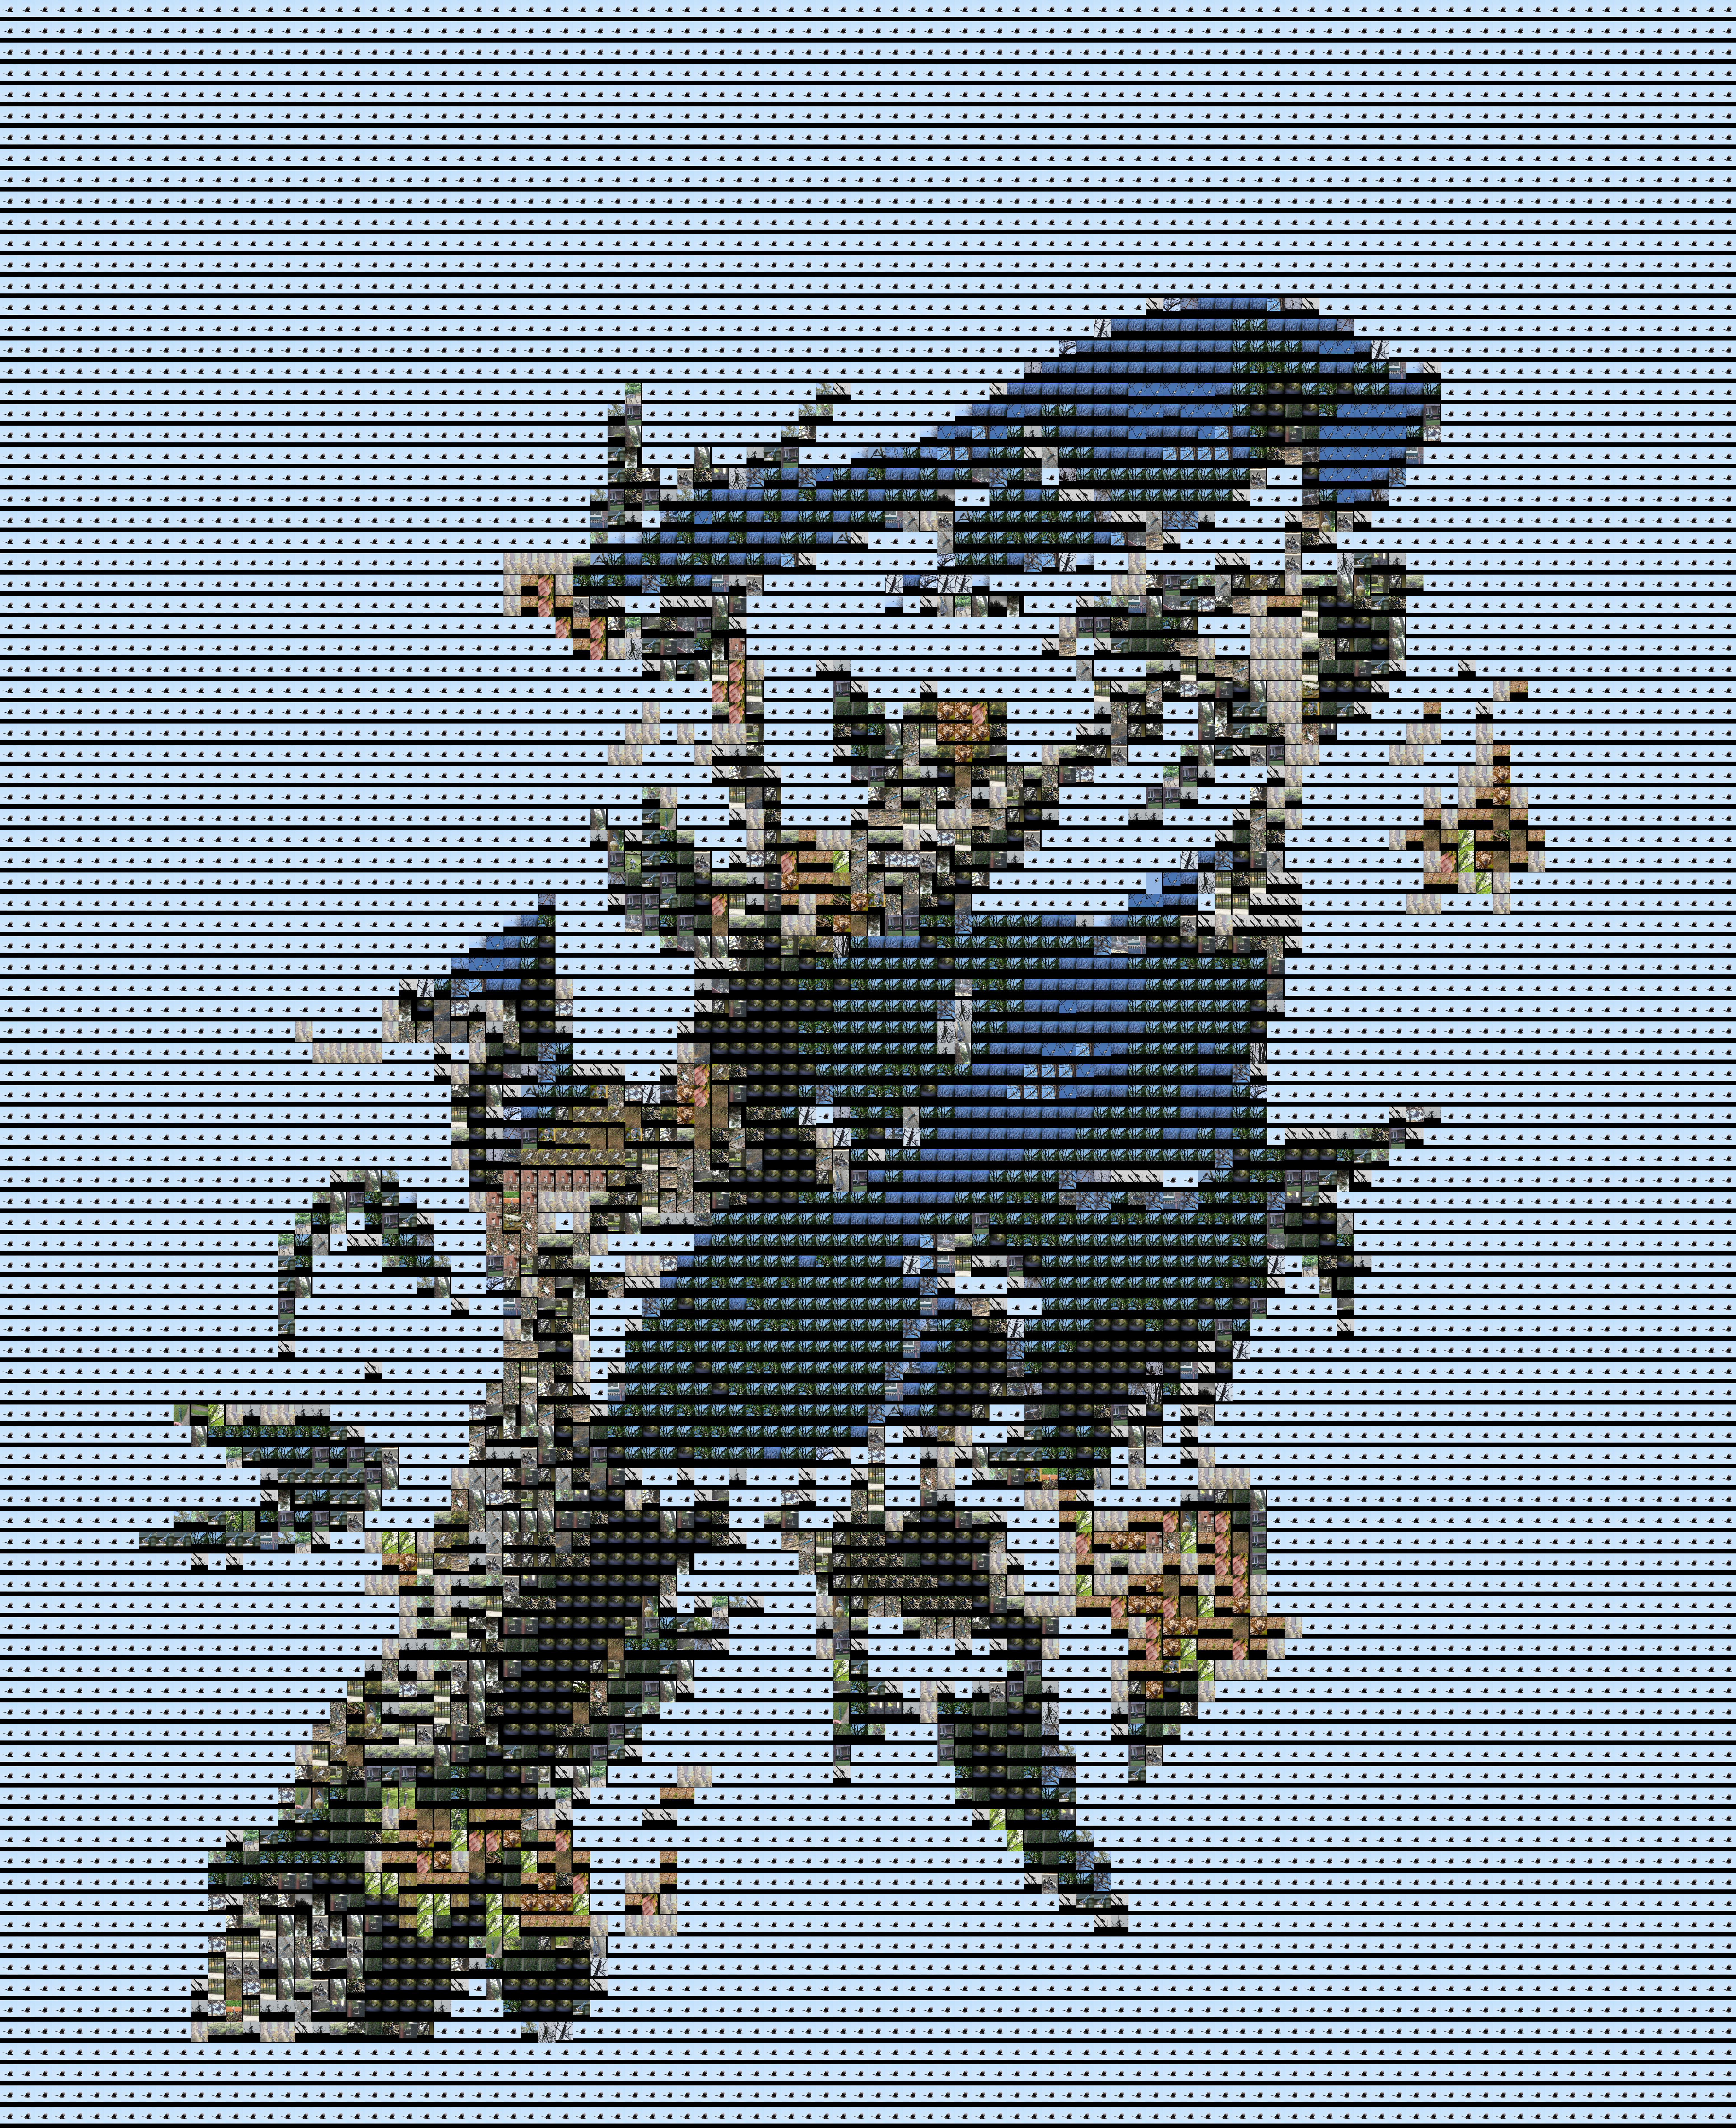

In [21]:
# to build mosaic

file = open("mosaic_commands.txt","w+")
for i in range(0,pa_birds.shape[0]):
    common_name = pa_birds['common_name'].iloc[i]
    target = pa_birds['audubon_img'].iloc[i]
    images = pa_birds['inaturalist_folder'].iloc[i]
    output = pa_birds['mosaic_img'].iloc[i]
    #output = "mosaics/" + common_name + ".jpeg"
    pa_birds.at[i,'mosaic_img'] = f'{directory_path}/' + output
    command = "python Mosaic_Creator.py --target " + target + " --images " + images + " --grid 100 100 --output " + output
    subprocess.run([command],shell=True)
    file.write(command + '\n')
file.close()

from IPython.display import Image
Image(filename=output) 

## Build an Instagram Post

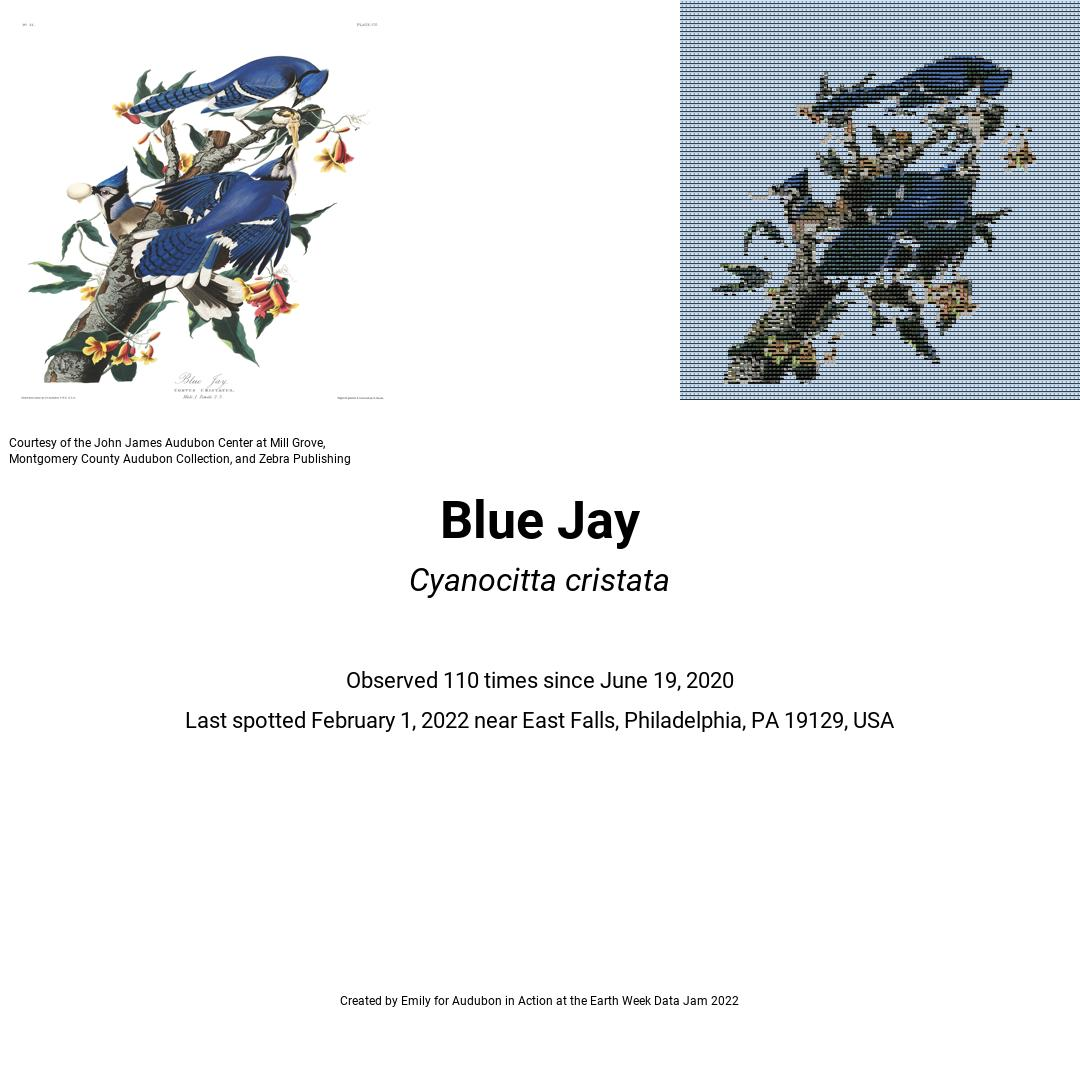

In [23]:
# to build display

from PIL import Image  
from PIL import ImageFont
from PIL import ImageDraw
import datetime
import re

width = 1080
height = 1080

for idx, row in pa_birds.iterrows():
    first_line = row.common_name
    second_line = row.scientific_name
    third_line = "Observed " + str(row['count']) + " times since June 19, 2020" # correct this
    
    obs = row.observed_on # double check that this works
    obs = datetime.datetime.strptime(obs,'%Y-%m-%d')
    obs = obs.strftime("%B %e, %Y")
    obs = re.sub(' +', ' ', obs)
    
    fourth_line = "Last spotted " + str(obs) + " near " + row.place_guess
    fifth_line = "Created by "+ your_name + " for Audubon in Action at the Earth Week Data Jam 2022"
    orig_image = f'{directory_path}/' + row.audubon_img
    created_image = row.mosaic_img
    output = f'{directory_path}/displays/' + row.bird_name + ".jpeg"

    img  = Image.new(mode = "RGB", size = (width, height), color = (255,255,255))
    img1 = Image.open(orig_image)
    img2 = Image.open(created_image)
    img1 = img1.resize((400,400))
    img2 = img2.resize((400,400))
    img.paste(img1, (0,0))
    img.paste(img2, (680,0))
    
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(f"{directory_path}/fonts/Roboto/Roboto-Regular.ttf", size=12)
    credit = "Courtesy of the John James Audubon Center at Mill Grove,\nMontgomery County Audubon Collection, and Zebra Publishing"
    draw.text((180,450), credit, (0,0,0), font=font, anchor="mm", align="left")
    
    font = ImageFont.truetype(f"{directory_path}/fonts/Roboto/Roboto-Bold.ttf", size=52)
    draw.text((540,520), first_line, (0,0,0), font=font, anchor="mm", align="center")

    font = ImageFont.truetype(f"{directory_path}/fonts/Roboto/Roboto-Italic.ttf", size=32)
    draw.text((540,580), second_line, (0,0,0), font=font, anchor="mm", align="center")

    font = ImageFont.truetype(f"{directory_path}/fonts/Roboto/Roboto-Regular.ttf", size=22)
    draw.text((540,680), third_line, (0,0,0), font=font, anchor="mm", align="center")

    font = ImageFont.truetype(f"{directory_path}/fonts/Roboto/Roboto-Regular.ttf", size=22)
    draw.text((540,720), fourth_line, (0,0,0), font=font, anchor="mm", align="center")

    font = ImageFont.truetype(f"{directory_path}/fonts/Roboto/Roboto-Regular.ttf", size=12)
    draw.text((540,1000), fifth_line, (0,0,0), font=font, anchor="mm", align="center")

    img.save(output)

from IPython.display import Image
Image(filename=output) 

## Build a Sound File

In [24]:
# to build sound
combined = AudioSegment.silent(duration=1)
directory_path = os.getcwd()

inaturalist_data = pd.read_csv("data/observations-218728.csv") # need to add most recent data
list_of_licenses = ['CC-BY-NC', 'CC-BY-NC-SA', 'CC-BY', 'CC0', 'CC-BY-SA', 'CC-BY-NC-ND']
inaturalist_data = inaturalist_data.loc[inaturalist_data['license'].isin(list_of_licenses)]
inaturalist_data = inaturalist_data[inaturalist_data['common_name']==your_bird].reset_index() 
inaturalist_data = inaturalist_data[inaturalist_data['observed_on'].str.startswith('2021')].reset_index()
dates = inaturalist_data['observed_on'].to_list()
start_date = datetime.datetime.strptime("2021-1-1",'%Y-%m-%d')

# get a list of day count for all the dates represented in inaturalist 
days_dates = {}
for day in dates: 
    end_date = datetime.datetime.strptime(day, '%Y-%m-%d')
    delta = end_date - start_date
    days_dates[delta.days] = day
#print(days_dates)

In [28]:
from pydub.playback import play
res = int(list(days_dates.keys())[0])
all_sounds = AudioSegment.silent(duration=1)
all_sounds.duration_seconds == int(delta.days)

for i in range(res,int(delta.days)):
    print(i)
    if i in days_dates.keys():
        print("yes")
        value = days_dates[i]
        spotted_birds = inaturalist_data[inaturalist_data['observed_on']==value].reset_index(drop=True)
        print(spotted_birds.shape[0])
        common_name = spotted_birds['common_name'].loc[spotted_birds.index[0]]
        print(common_name)
        bird_name = common_name.lower()
        bird_name = '-'.join(bird_name.split())
        sounds_folder = f'{directory_path}/sounds/' + bird_name
        sound_file = random.choice(os.listdir(sounds_folder))
        sound_type = sound_file.rsplit('.')[1]
        sound_file = sounds_folder + "/" + sound_file
        print(sound_file)
        sound = AudioSegment.from_file(sound_file, sound_type)
        sound = sound[1000:2000]
        combined = sound + 10
        for idx, row in spotted_birds[1:].iterrows(): 
            common_name = spotted_birds['common_name'].loc[spotted_birds.index[idx]]
            bird_name = common_name.lower()
            bird_name = '-'.join(bird_name.split())
            sounds_folder = f'{directory_path}/sounds/' + bird_name
            sound_file = random.choice(os.listdir(sounds_folder))
            sound_type = sound_file.rsplit('.')[1]
            sound_file = sounds_folder + "/" + sound_file
            sound = AudioSegment.from_file(sound_file, sound_type)
            sound = sound[1000:2000]
            sound = sound + 15
            combined.overlay(sound)
            #play(combined)
    else:
        print("no")
        combined = AudioSegment.silent(duration=1000)
    all_sounds = all_sounds + combined
filename = "sounds/" + your_bird + "-output.mp3"
all_sounds.export(filename, format="mp3")
print("sound created!")

64
yes
1
Blue Jay
/Users/estene/Documents/GitHub/audubon/sounds/blue-jay/45601694.wav
65
no
66
no
67
no
68
no
69
no
70
no
71
no
72
no
73
no
74
no
75
no
76
no
77
no
78
no
79
no
80
no
81
no
82
no
83
no
84
no
85
no
86
no
87
no
88
no
89
no
90
no
91
no
92
no
93
no
94
no
95
no
96
no
97
no
98
no
99
no
100
no
101
no
102
no
103
no
104
no
105
no
106
no
107
no
108
no
109
yes
1
Blue Jay
/Users/estene/Documents/GitHub/audubon/sounds/blue-jay/45601694.wav
110
no
111
no
112
yes
1
Blue Jay
/Users/estene/Documents/GitHub/audubon/sounds/blue-jay/45601694.wav
113
no
114
no
115
no
116
yes
1
Blue Jay
/Users/estene/Documents/GitHub/audubon/sounds/blue-jay/45601694.wav
117
no
118
no
119
yes
4
Blue Jay
/Users/estene/Documents/GitHub/audubon/sounds/blue-jay/45601694.wav
120
yes
10
Blue Jay
/Users/estene/Documents/GitHub/audubon/sounds/blue-jay/45601694.wav
121
no
122
yes
3
Blue Jay
/Users/estene/Documents/GitHub/audubon/sounds/blue-jay/45601694.wav
123
yes
1
Blue Jay
/Users/estene/Documents/GitHub/audubon/soun

In [ ]:
all_sounds

## Credits

Created by [Emily Esten](https://www.library.upenn.edu/people/staff/emily-esten) for Earth Week Data Jam 2022.

The Center for Research Data and Digital Scholarship facilitates data-driven and data-literate research and scholarship across the disciplines in order to foster informed and ethical data communites at Penn. Interested in data, computational research, digital humanities, or open and public scholarship? Find us on the [Penn Libraries website](https://www.library.upenn.edu/help-with/research-data-digital-scholarship). 